pandas 
openpyxl


# Intuito dessa atividade é desenvolver um aprendizado com tecnicas não supervisionadas, sendo proposto o uso de KMeans

### encontrar os perfis de olhos baseado nas respectivas medidas _(dados brutos, e só podemos usar eles, não podemos juntar os valores para formar um terceiro)_:

    AL = comprimento axial do olho - interesante para clasificar 
    ACD = profundidade de câmara anterior
    WTW = distância brando a branco
    K1 = curvatura no meridiano menos curvo - interesante para clasificar
    K2 = curvatura no meridiano mais curvo - interesante para clasificar

### atividade será apresentar o perfil dos grupos encontrados conjunto de individuos, perfis de olhos que compartilham semelhanças [agrupamento por semelhança, Clusterização  e analise de agrupamento]
 
 
_Atenção: a atividade consiste nos grupos encontrados baseados somente nas variáveis acima. Cuidado para não confundir a ideia de grupo com classe!_

## Biometria Ocular 
é o exame que mensura várias características anatômicas do olho que são necessárias para o _cálculo do poder refrativo da lente intraocular, na Cirurgia de Catarata._

## olho tem três elementos refrativos: 
    
    1. Córnea [Serve como lente biconvexa, com um raio de curvatura menor que o do cristalino]
    
    2. Cristalino [É uma lente biconvexa, com um raio de curvatura maior que o da córnea] 
    
    3. Comprimento axial [responsáveis pela focalização dos raios de luz na retina]


In [86]:
%pip install -q --upgrade pip
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [88]:
def read_excel(excel_path):
    # Verificar se o arquivo existe
    if os.path.exists(excel_path):
        dataset = pd.read_excel(excel_path)
        colunas = dataset.columns.tolist()
        print('Arquivo lido com sucesso')
        
        
        print(f'Nomes das colunas:\n{colunas}\n')
        print(f'Tipo de dados do dataSet:\n{dataset.dtypes}\n')
    
        print(f'Valores nulos:\n{dataset.isnull().sum()}\n')
        print(f'Valores únicos:\n{dataset.nunique()}\n')
        print(f'Valores duplicados: {dataset.duplicated().sum()}')
        
        print(f'Descrição do dataSet:\n{dataset.describe()}\n')
        print(f'Primeiras cinco linhas do dataSet:\n{dataset.head()}\n')
        
        print(f'target:\n{dataset[colunas[-1]].unique()}\n')
        return dataset, colunas
    else:
        print('Arquivo não encontrado!')
        return None, None

In [89]:
def change_objectColumns(dataset, coluna):
    if dataset[coluna].dtype == 'object':
        dataset[coluna] = dataset[coluna].replace({'S': 1, 'N': 0})
        dataset[coluna] = dataset[coluna].astype(int)
    return dataset

def remover_coluna(dataset, coluna):
    dataset = dataset.drop(coluna, axis=1)
    return dataset  # Retorna o DataFrame modificado

In [90]:
#leitura do arquivo Exvcel
dataset, colunas=read_excel('barrettII_eyes_clustering.xlsx')

Arquivo lido com sucesso
Nomes das colunas:
['ID', 'AL', 'ACD', 'WTW', 'K1', 'K2', 'Correto']

Tipo de dados do dataSet:
ID           int64
AL         float64
ACD        float64
WTW        float64
K1         float64
K2         float64
Correto     object
dtype: object

Valores nulos:
ID         0
AL         0
ACD        0
WTW        0
K1         0
K2         0
Correto    0
dtype: int64

Valores únicos:
ID         1528
AL          447
ACD         210
WTW          31
K1          174
K2          167
Correto       2
dtype: int64

Valores duplicados: 0
Descrição do dataSet:
               ID           AL          ACD          WTW           K1  \
count  1528.00000  1528.000000  1528.000000  1528.000000  1528.000000   
mean    763.50000    23.486525     3.106728    11.975098    43.469188   
std     441.23992     1.142280     0.428881     0.431712     1.745504   
min       0.00000    20.150000     1.130000     9.900000    30.930000   
25%     381.75000    22.760000     2.830000    11.700000    

In [91]:
dataset=change_objectColumns(dataset, colunas[-1])

dataset = remover_coluna(dataset, colunas[0])
"""
S : 1
N : 0
"""

'\nS : 1\nN : 0\n'

In [92]:
colunas = dataset.columns.tolist()

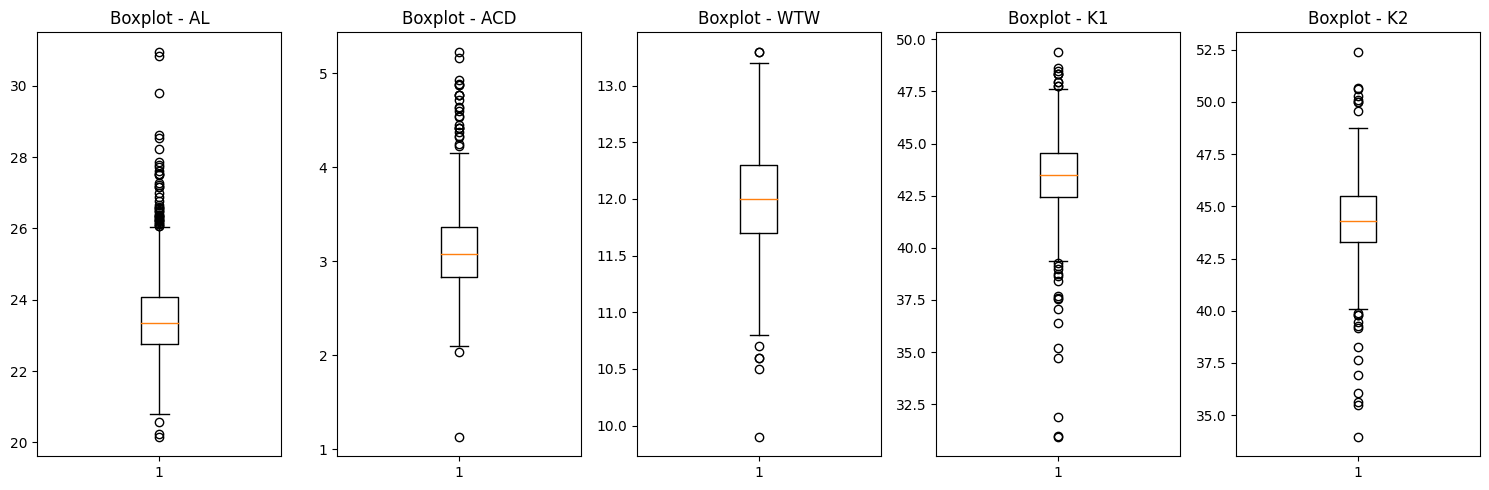

In [93]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

colunas = dataset.columns.tolist() 

for i in range(5):  
    axs[i].boxplot(dataset[colunas[i]])  
    axs[i].set_title(f'Boxplot - {colunas[i]}')  

plt.tight_layout()
plt.show()


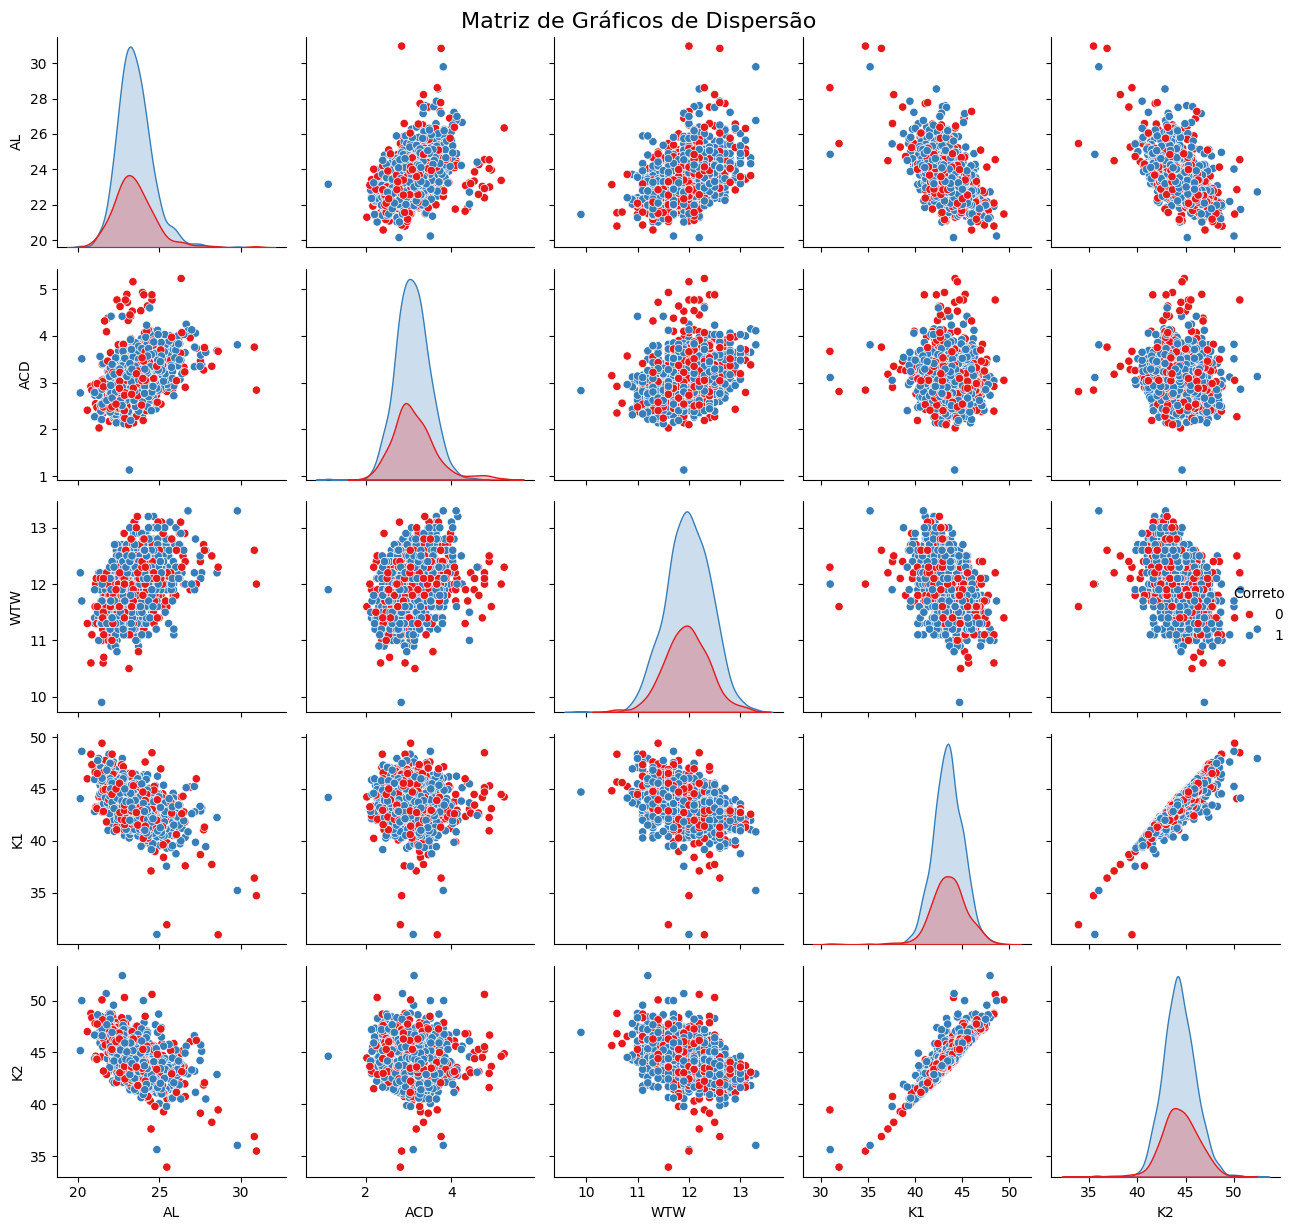

In [94]:
pairplot = sns.pairplot(dataset, hue='Correto', palette='Set1')
'''
pairplot gera uma matriz de gráficos de dispersão
hue(traduzido: matiz) define qual variável que vai influenciar a cor dos pontos
'''

pairplot.fig.suptitle('Matriz de Gráficos de Dispersão', size=16)

# Ajustar o layout para não sobrepor o título e os gráficos
plt.tight_layout()
plt.show()

/Users/davideneas/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davideneas/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davideneas/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davideneas/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1

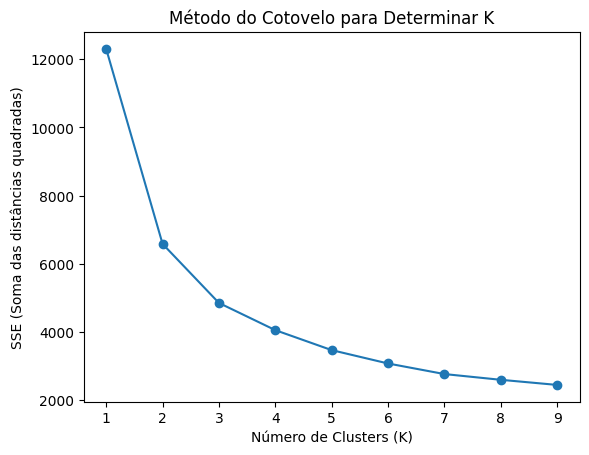

In [95]:
# Determinando o número de clusters (K) usando o método do cotovelo (Elbow Method) -identificar o número ideal de clusters, procurando o “cotovelo” no gráfico da soma dos erros quadráticos.


"""
Soma dos Erros Quadráticos (SSE - Sum of Squared Errors) ou Within-Cluster Sum of Squares (WCSS).

O ponto onde a diminuição do SSE começa a desacelerar significativamente é conhecido como o cotovelo. Este ponto é considerado o número ideal de clusters.


"""
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(dataset) 
    sse.append(kmeans.inertia_) 

plt.plot(range(1, 10), sse, marker='o')
plt.title('Método do Cotovelo para Determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE (Soma das distâncias quadradas)')
plt.show()

In [96]:
dataset.head()

,AL,ACD,WTW,K1,K2,Correto
0,23.79,3.32,12.0,43.60,44.29,1
1,24.60,3.39,12.3,42.03,43.95,1
2,24.59,3.51,12.3,42.83,43.05,1
3,24.04,2.96,12.0,42.35,42.83,1
4,24.80,2.44,12.2,41.01,41.67,1


In [108]:
# Definindo o número de clusters (K=2, como exemplo)

# KMeans com o algoritmo correto
kmeans = KMeans(
    n_clusters=2,
    init='k-means++',  # Inicialização inteligente
    n_init=10,  # Número de tentativas com diferentes inicializações
    max_iter=6,  # Número máximo de iterações
    tol=1e-6,  # Critério de parada precisão da convergência
    random_state=42,  # Reprodutibilidade
    algorithm='lloyd'  # Escolha do algoritmo (lloyd ou elkan)algorithm define o método de clusterização, e você deve escolher entre 'lloyd' (padrão), 'elkan' (otimizado para dados densos) ou 'auto' (depreciado nas versões mais recentes do scikit-learn).
)

labels = kmeans.fit_predict(dataset)  # Ajusta o modelo e gera os rótulos dos clusters

In [98]:
print(f'Rótulos dos clusters:\n{labels}\n')

Rótulos dos clusters:
[0 0 0 ... 0 0 0]



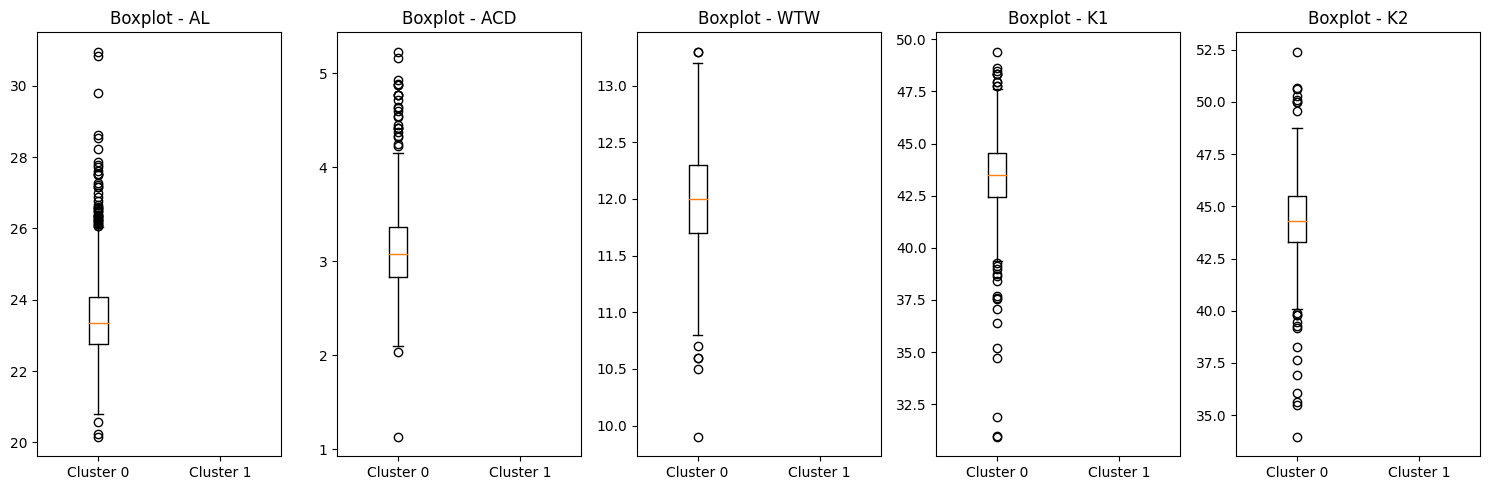

In [99]:
dataset['Cluster'] = labels

colunas = dataset.columns.tolist() 

cluster_0 = dataset[dataset['Cluster'] == 0]
cluster_1 = dataset[dataset['Cluster'] == 1]

# Definindo as colunas para plotar
colunas = ['AL', 'ACD', 'WTW', 'K1', 'K2']

# Criando o gráfico
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Gerando boxplots para cada coluna
for i, col in enumerate(colunas):
    # Plotando o boxplot dos dois clusters para cada variável
    axs[i].boxplot([cluster_0[col], cluster_1[col], ], labels=['Cluster 0', 'Cluster 1'])
    axs[i].set_title(f'Boxplot - {col}')  # Definindo o título de cada boxplot

# Ajustando o layout
plt.tight_layout()
plt.show()


fazer boxplot

# Clauster 0:
Pode insicar um olho com miopia já que o comprimento axial menor combinado com uma curvatura da córnea maior sugere que a luz está focando antes da retina.

# Clauster 1:
pode indicar o tamanho normal de um olho saudavel 

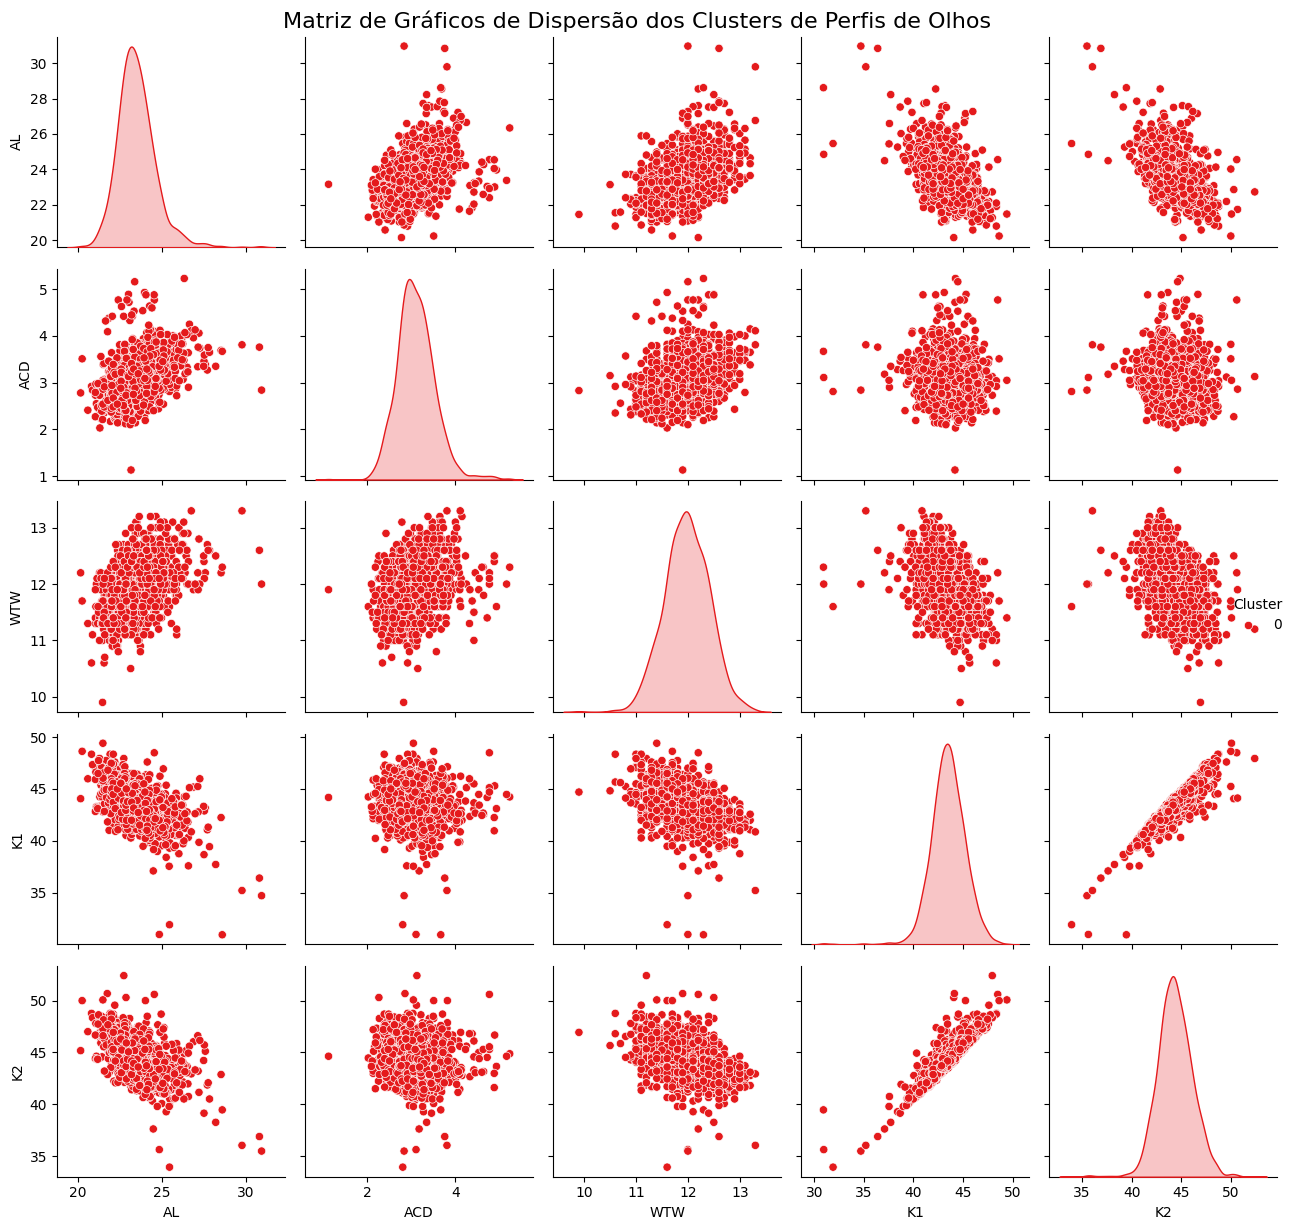

In [100]:
sns.pairplot(dataset.drop('Correto', axis=1), hue='Cluster', palette='Set1')

# Adicionando título ao gráfico
plt.suptitle('Matriz de Gráficos de Dispersão dos Clusters de Perfis de Olhos', size=16)
plt.tight_layout()  # Ajusta o layout para que o título não sobreponha os gráficos
plt.show()

In [110]:
# Método da Distância de Gap (Gap Statistic) -compara a soma das distâncias intra-cluster (como o SSE no método do cotovelo) com a distribuição de distâncias gerada por uma distribuição aleatória (geralmente uma distribuição uniforme).

# Calculando o silhouette score para avaliar a qualidade do agrupamento

silhouette_avg = silhouette_score(dataset, labels)
print(f'Silhouette Score: {round(silhouette_avg, 4)}')


"""
Método da Silhueta (Silhouette Method)
    Calcula a qualidade do agrupamento com base na similaridade entre os pontos dentro do cluster e os pontos de outros clusters

    Varia entre -1 até 1
    -1 - pontos estão mal agrupados
     0 - pontos estão na fronteira entre dois clusters (os valores estão se sobrepondo)
     1 - pontos estão bem agrupados
"""

Silhouette Score: 0.3896


'\nMétodo da Silhueta (Silhouette Method)\n    Calcula a qualidade do agrupamento com base na similaridade entre os pontos dentro do cluster e os pontos de outros clusters\n\n    Varia entre -1 até 1\n    -1 - pontos estão mal agrupados\n     0 - pontos estão na fronteira entre dois clusters (os valores estão se sobrepondo)\n     1 - pontos estão bem agrupados\n'

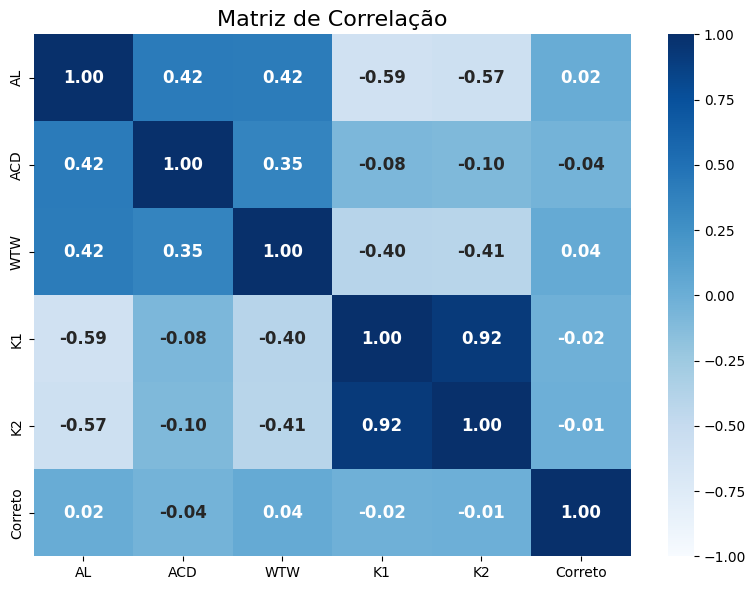

In [ ]:
correlation_matrix = dataset.drop('Cluster', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=plt.cm.Blues,
            annot_kws={'size': 12, 'weight': 'bold'},
            vmin=-1, vmax=1)

plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()

/Users/davideneas/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


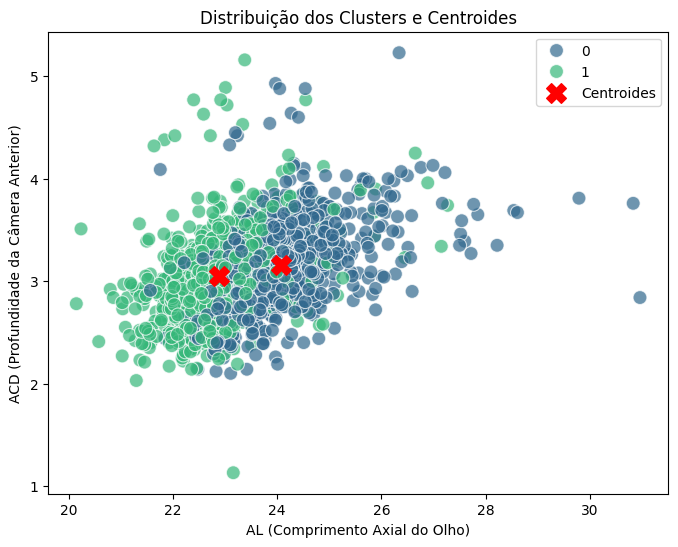

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Ajustando o KMeans, se não tiver sido feito anteriormente
kmeans = KMeans(n_clusters=2, random_state=15)
labels = kmeans.fit_predict(dataset.iloc[:, :-1])  # Excluindo a coluna de 'Cluster' se necessário

# Adicionando os rótulos dos clusters ao dataset
dataset['Cluster'] = labels

# Calculando as centroides (média de cada cluster)
centroides = kmeans.cluster_centers_

# Criando o gráfico de dispersão para as duas primeiras variáveis (exemplo: AL e ACD)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['AL'], y=dataset['ACD'], hue=dataset['Cluster'], palette='viridis', s=100, alpha=0.7)

# Adicionando as centroides ao gráfico
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

# Definindo título e legendas
plt.title('Distribuição dos Clusters e Centroides')
plt.xlabel('AL (Comprimento Axial do Olho)')
plt.ylabel('ACD (Profundidade da Câmera Anterior)')
plt.legend()

# Exibindo o gráfico
plt.show()